In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score ,roc_auc_score, roc_curve
from sklearn.metrics import classification_report , plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path



In [2]:
df = pd.read_csv('clean_drop1.csv')

In [3]:
#select features with highest corr
df.head()

,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,Electronic_bullying_2.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
0,0,0,0,0,0,1,0,1,1,1,...,2.0,4.0,2.0,2.0,6.0,5.0,1.0,1.0,1.0,0.0
1,0,0,0,0,0,0,1,1,0,1,...,1.0,4.0,2.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0
2,0,0,0,0,0,0,1,0,1,1,...,1.0,5.0,2.0,1.0,5.0,1.0,1.0,3.0,1.0,0.0
3,0,0,0,1,0,0,0,1,1,1,...,1.0,4.0,3.0,1.0,6.0,1.0,1.0,3.0,1.0,1.0
4,0,0,0,0,1,0,0,1,1,1,...,1.0,2.0,1.0,3.0,6.0,2.0,1.0,3.0,2.0,0.0


In [4]:
df_open = df[['Gender_2.0','Asthma_2.0','Asthma_3.0','Food_allergies_2.0','Food_allergies_3.0','Difficulty_concentrating_2.0',
        'Oral_health_care_2.0','Oral_health_care_3.0','Oral_health_care_4.0','Oral_health_care_5.0','Weight_loss_2.0','Weight_loss_3.0','Weight_loss_4.0',
        'Grade','Perception_of_weight','Fruit_juice_drinking','Fruit_eating','Green_salad_eating','Potato_eating','Carrot_eating','Other_vegetable_eating','No_soda_drinking','No_milk_drinking','Breakfast_eating','Physical_activity_>=_5_days','Television_watching',
        'Seat_belt_use','Computer_use','PE_attendance','Sports_team_participation','Concussion','Sleep','Grades_in_school','Sports_drinks','Plain_water','Muscle_strengthening','Indoor_tanning','Sunscreen','How_well_speak_English','Tried_weed']]


In [5]:
corr_matrix = df_open.corr()
corr_matrix

,Gender_2.0,Asthma_2.0,Asthma_3.0,Food_allergies_2.0,Food_allergies_3.0,Difficulty_concentrating_2.0,Oral_health_care_2.0,Oral_health_care_3.0,Oral_health_care_4.0,Oral_health_care_5.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
Gender_2.0,1.000000,-0.014760,0.003655,0.079309,-0.016078,0.128981,0.002835,0.008386,0.034613,0.021711,...,0.062763,0.050508,0.109757,0.152551,-0.030032,0.190403,-0.035029,-0.161486,0.063252,0.000698
Asthma_2.0,-0.014760,1.000000,-0.363825,0.106865,-0.021368,0.082860,0.013002,-0.014551,0.011773,-0.026135,...,-0.065387,0.075700,-0.044070,-0.020865,0.022317,0.022129,-0.036283,0.014477,-0.036473,-0.034864
Asthma_3.0,0.003655,-0.363825,1.000000,-0.046648,0.054255,-0.038683,0.022163,0.020452,0.016767,0.087627,...,0.070142,-0.020809,0.085246,0.034646,-0.038864,-0.012731,0.070299,-0.003763,0.099495,0.008592
Food_allergies_2.0,0.079309,0.106865,-0.046648,1.000000,-0.593620,0.238478,0.024989,-0.004324,-0.001066,-0.020342,...,-0.046464,0.057450,-0.015374,-0.033827,-0.038624,-0.003010,-0.051534,-0.001034,-0.053071,0.003757
Food_allergies_3.0,-0.016078,-0.021368,0.054255,-0.593620,1.000000,-0.129807,-0.005282,0.005988,0.027106,0.058249,...,0.023312,-0.016645,0.048780,0.041078,0.001870,-0.015181,0.022110,-0.019388,0.084880,-0.020043
Difficulty_concentrating_2.0,0.128981,0.082860,-0.038683,0.238478,-0.129807,1.000000,-0.009063,-0.058340,-0.011291,-0.040451,...,-0.051268,0.183741,-0.145571,-0.011641,0.016788,0.101998,-0.047820,0.049404,-0.062626,-0.164226
Oral_health_care_2.0,0.002835,0.013002,0.022163,0.024989,-0.005282,-0.009063,1.000000,-0.083415,-0.051590,-0.101242,...,0.029897,-0.051694,0.098076,0.009493,-0.043927,-0.037047,-0.006740,-0.057057,0.021008,0.030982
Oral_health_care_3.0,0.008386,-0.014551,0.020452,-0.004324,0.005988,-0.058340,-0.083415,1.000000,-0.028066,-0.055078,...,0.033474,-0.043124,0.061880,0.005107,-0.024675,-0.043702,0.006057,-0.056426,0.019802,0.045125
Oral_health_care_4.0,0.034613,0.011773,0.016767,-0.001066,0.027106,-0.011291,-0.051590,-0.028066,1.000000,-0.034064,...,0.068819,-0.029564,0.080604,0.021198,-0.087106,-0.042590,0.109563,-0.065573,0.105512,0.005683
Oral_health_care_5.0,0.021711,-0.026135,0.087627,-0.020342,0.058249,-0.040451,-0.101242,-0.055078,-0.034064,1.000000,...,0.042275,0.001037,0.133073,0.019794,-0.062127,-0.039263,0.018607,-0.063762,0.101664,-0.021321


In [6]:
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
print (so)

Food_allergies_3.0  Food_allergies_2.0   -0.593620
Food_allergies_2.0  Food_allergies_3.0   -0.593620
Asthma_3.0          Asthma_2.0           -0.363825
Asthma_2.0          Asthma_3.0           -0.363825
Weight_loss_3.0     Weight_loss_2.0      -0.304971
                                            ...   
Breakfast_eating    Breakfast_eating      1.000000
No_milk_drinking    No_milk_drinking      1.000000
No_soda_drinking    No_soda_drinking      1.000000
PE_attendance       PE_attendance         1.000000
Tried_weed          Tried_weed            1.000000
Length: 1600, dtype: float64


In [7]:
so.to_csv('so_open.csv') 

In [120]:
#X = df_open[['Sleep',
#'Sunscreen',
#'Breakfast_eating',
#'Difficulty_concentrating_2.0',
#'Grade',
#'Sports_drinks',
#'Indoor_tanning',
#'Grades_in_school','No_soda_drinking','Seat_belt_use']]

X = df_open[['Grade',
'Seat_belt_use',
'Difficulty_concentrating_2.0',
'Breakfast_eating',
'Sports_drinks',
'Indoor_tanning',
'Grades_in_school',
'Sunscreen']]


y = df_open.iloc[:, -1]

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KNN using RandomizedSearchCV

In [123]:
# define the parameter values that should be searched
k_range = list(range(63, 75))
weight_options = ['uniform', 'distance']

In [124]:
knn = KNeighborsClassifier()

In [125]:

# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [126]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.725612,0.015178,"{'weights': 'uniform', 'n_neighbors': 73}"
1,0.724502,0.014377,"{'weights': 'uniform', 'n_neighbors': 64}"
2,0.678554,0.016465,"{'weights': 'distance', 'n_neighbors': 71}"
3,0.725512,0.015357,"{'weights': 'uniform', 'n_neighbors': 72}"
4,0.678491,0.016641,"{'weights': 'distance', 'n_neighbors': 72}"
5,0.678585,0.016466,"{'weights': 'distance', 'n_neighbors': 74}"
6,0.678791,0.016341,"{'weights': 'distance', 'n_neighbors': 69}"
7,0.725440,0.014553,"{'weights': 'uniform', 'n_neighbors': 68}"
8,0.678618,0.015994,"{'weights': 'distance', 'n_neighbors': 65}"
9,0.678289,0.016137,"{'weights': 'distance', 'n_neighbors': 63}"


In [127]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.725611823589367
{'weights': 'uniform', 'n_neighbors': 73}


In [128]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=73, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=73)

In [129]:
# make a prediction on out-of-sample data
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


[[1454  170]
 [ 602  424]]
0.7086792452830188
0.6542877788340583


In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79      1624
         1.0       0.71      0.41      0.52      1026

    accuracy                           0.71      2650
   macro avg       0.71      0.65      0.66      2650
weighted avg       0.71      0.71      0.69      2650



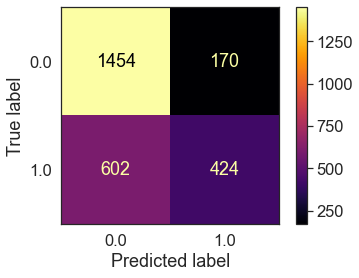

In [131]:
plot_confusion_matrix(knn, X_test, y_test, cmap='inferno')  
plt.show()  

### Logistic Regression using RandomizedSearchCV

In [132]:
# define the parameter values that should be searched
solver_options =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_options = ['l1', 'l2']
iter_range = [100,200,300]
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']

In [133]:
logr =LogisticRegression(random_state = 0)

In [134]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(solver=solver_options , max_iter=iter_range, penalty = penalty_options)

In [135]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(logr, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,NaN,NaN,"{'solver': 'newton-cg', 'penalty': 'l1', 'max_..."
1,NaN,NaN,"{'solver': 'lbfgs', 'penalty': 'l1', 'max_iter..."
2,0.676103,0.009625,"{'solver': 'liblinear', 'penalty': 'l1', 'max_..."
3,NaN,NaN,"{'solver': 'sag', 'penalty': 'l1', 'max_iter':..."
4,0.676009,0.009667,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'..."
5,0.676103,0.009625,"{'solver': 'newton-cg', 'penalty': 'l2', 'max_..."
6,0.676103,0.009625,"{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter..."
7,0.676198,0.009524,"{'solver': 'liblinear', 'penalty': 'l2', 'max_..."
8,0.676009,0.009580,"{'solver': 'sag', 'penalty': 'l2', 'max_iter':..."
9,0.676103,0.009625,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'..."


In [136]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.6761979973987564
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100}


In [137]:
# train your model using all data and the best known parameters
logr = LogisticRegression(solver= 'liblinear')
logr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [138]:
# make a prediction on out-of-sample data
y_pred = logr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1419  205]
 [ 635  391]]
0.6830188679245283
0.6274300454200635


In [139]:
print(classification_report(y_test, y_pred)) #this is worse than simple

              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77      1624
         1.0       0.66      0.38      0.48      1026

    accuracy                           0.68      2650
   macro avg       0.67      0.63      0.63      2650
weighted avg       0.68      0.68      0.66      2650



### SVC using RandomizedSearchCV

In [140]:
# define the parameter values that should be searched
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
#solver_options =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#penalty_options = ['l1', 'l2']
#iter_range = [100,200,300]
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']

In [141]:
svcr =SVC(random_state = 0)

In [142]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(kernel=kernel_options)

In [143]:
# n_iter controls the number of searches #'accuracy'  'roc_auc'
rand = RandomizedSearchCV(svcr, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]  

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_test_score,std_test_score,params
0,0.668366,0.007172,{'kernel': 'linear'}
1,0.672516,0.009794,{'kernel': 'poly'}
2,0.701490,0.010498,{'kernel': 'rbf'}
3,0.571818,0.022782,{'kernel': 'sigmoid'}


In [144]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.7014896573841467
{'kernel': 'rbf'}


In [145]:
# train your model using all data and the best known parameters
svcr =SVC(random_state = 0, kernel='rbf')
svcr.fit(X_train, y_train)

SVC(random_state=0)

In [146]:
# make a prediction on out-of-sample data
y_pred = svcr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1479  145]
 [ 619  407]]
0.7116981132075472
0.6537002227791701


In [147]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79      1624
         1.0       0.74      0.40      0.52      1026

    accuracy                           0.71      2650
   macro avg       0.72      0.65      0.66      2650
weighted avg       0.72      0.71      0.69      2650



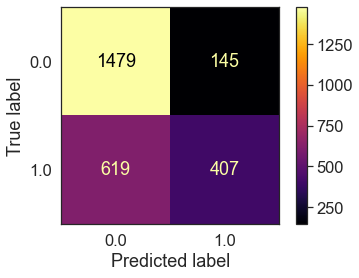

In [188]:
plot_confusion_matrix(svcr, X_test, y_test, cmap='inferno')  
plt.show()  

In [148]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1457  167]
 [ 728  298]]
0.6622641509433962
0.5938079153823256


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77      1624
         1.0       0.64      0.29      0.40      1026

    accuracy                           0.66      2650
   macro avg       0.65      0.59      0.58      2650
weighted avg       0.66      0.66      0.62      2650



In [151]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1229  395]
 [ 526  500]]
0.6524528301886793
0.6220514168563172


In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73      1624
         1.0       0.56      0.49      0.52      1026

    accuracy                           0.65      2650
   macro avg       0.63      0.62      0.62      2650
weighted avg       0.65      0.65      0.65      2650



### Random Forest using RandomizedSearchCV

In [154]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion_options =['gini','entropy']

In [155]:
rf= RandomForestClassifier(random_state = 0)

In [156]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
#param_dist = dict(solver=solver_options , max_iter=iter_range, penalty = penalty_options)

In [157]:
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap , 'criterion' : criterion_options}

In [158]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.705267,0.011468,"{'n_estimators': 1200, 'min_samples_split': 2,..."
1,0.714232,0.007470,"{'n_estimators': 1000, 'min_samples_split': 2,..."
2,0.707249,0.012891,"{'n_estimators': 2000, 'min_samples_split': 10..."
3,0.711401,0.009692,"{'n_estimators': 1400, 'min_samples_split': 5,..."
4,0.706116,0.009964,"{'n_estimators': 1400, 'min_samples_split': 10..."
5,0.694979,0.011225,"{'n_estimators': 200, 'min_samples_split': 2, ..."
6,0.706022,0.011751,"{'n_estimators': 600, 'min_samples_split': 5, ..."
7,0.706209,0.009884,"{'n_estimators': 200, 'min_samples_split': 10,..."
8,0.685166,0.012445,"{'n_estimators': 600, 'min_samples_split': 2, ..."
9,0.707532,0.011870,"{'n_estimators': 2000, 'min_samples_split': 10..."


In [159]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.7142316532150302
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [160]:
# train your model using all data and the best known parameters
rf= RandomForestClassifier(random_state = 0,n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 4, max_features ='sqrt', max_depth = 50, criterion = 'entropy', bootstrap = True)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400, random_state=0)

In [161]:
# make a prediction on out-of-sample data
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


[[1413  211]
 [ 527  499]]
0.7215094339622642
0.6782143337270379


In [162]:
print(classification_report(y_test, y_pred)) #f1 is 0.01 better than simple

              precision    recall  f1-score   support

         0.0       0.73      0.87      0.79      1624
         1.0       0.70      0.49      0.57      1026

    accuracy                           0.72      2650
   macro avg       0.72      0.68      0.68      2650
weighted avg       0.72      0.72      0.71      2650



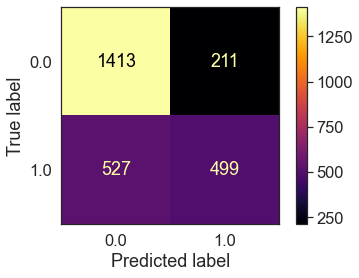

In [163]:
plot_confusion_matrix(rf, X_test, y_test, cmap='inferno')  
plt.show()  

In [164]:

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

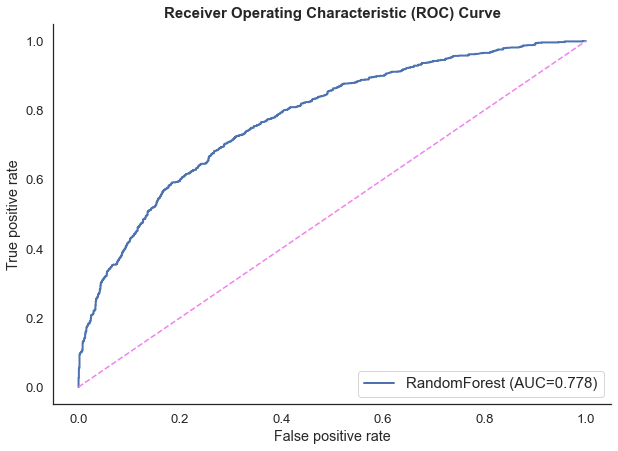

In [165]:

sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
plt.plot(fpr, tpr,lw=2,label='RandomForest (AUC={:.3f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc="lower right",fontsize=15)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',weight='bold',fontsize=15);
sns.despine()
plt.savefig('ROCplot.png',transparent=True, bbox_inches='tight')

In [166]:
#try gridsearch on RF
#https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
 #   https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c
        
  #      shl we update the KNNimputer? to 29?

In [167]:
df_impt = pd.DataFrame({'features':X.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=False)
df_impt

,features,importance
3,Breakfast_eating,0.167339
5,Indoor_tanning,0.153178
7,Sunscreen,0.147909
4,Sports_drinks,0.145223
1,Seat_belt_use,0.121153
0,Grade,0.117589
6,Grades_in_school,0.098968
2,Difficulty_concentrating_2.0,0.048642


In [168]:
df_impt.head(5)

,features,importance
3,Breakfast_eating,0.167339
5,Indoor_tanning,0.153178
7,Sunscreen,0.147909
4,Sports_drinks,0.145223
1,Seat_belt_use,0.121153


In [169]:
df_open_s = df_open[['Sleep',
'Sunscreen',
'Breakfast_eating',
'Difficulty_concentrating_2.0',
'Seat_belt_use',
'Grade',
'Sports_drinks',
'Indoor_tanning',
'Grades_in_school',
'No_soda_drinking','Tried_weed']]

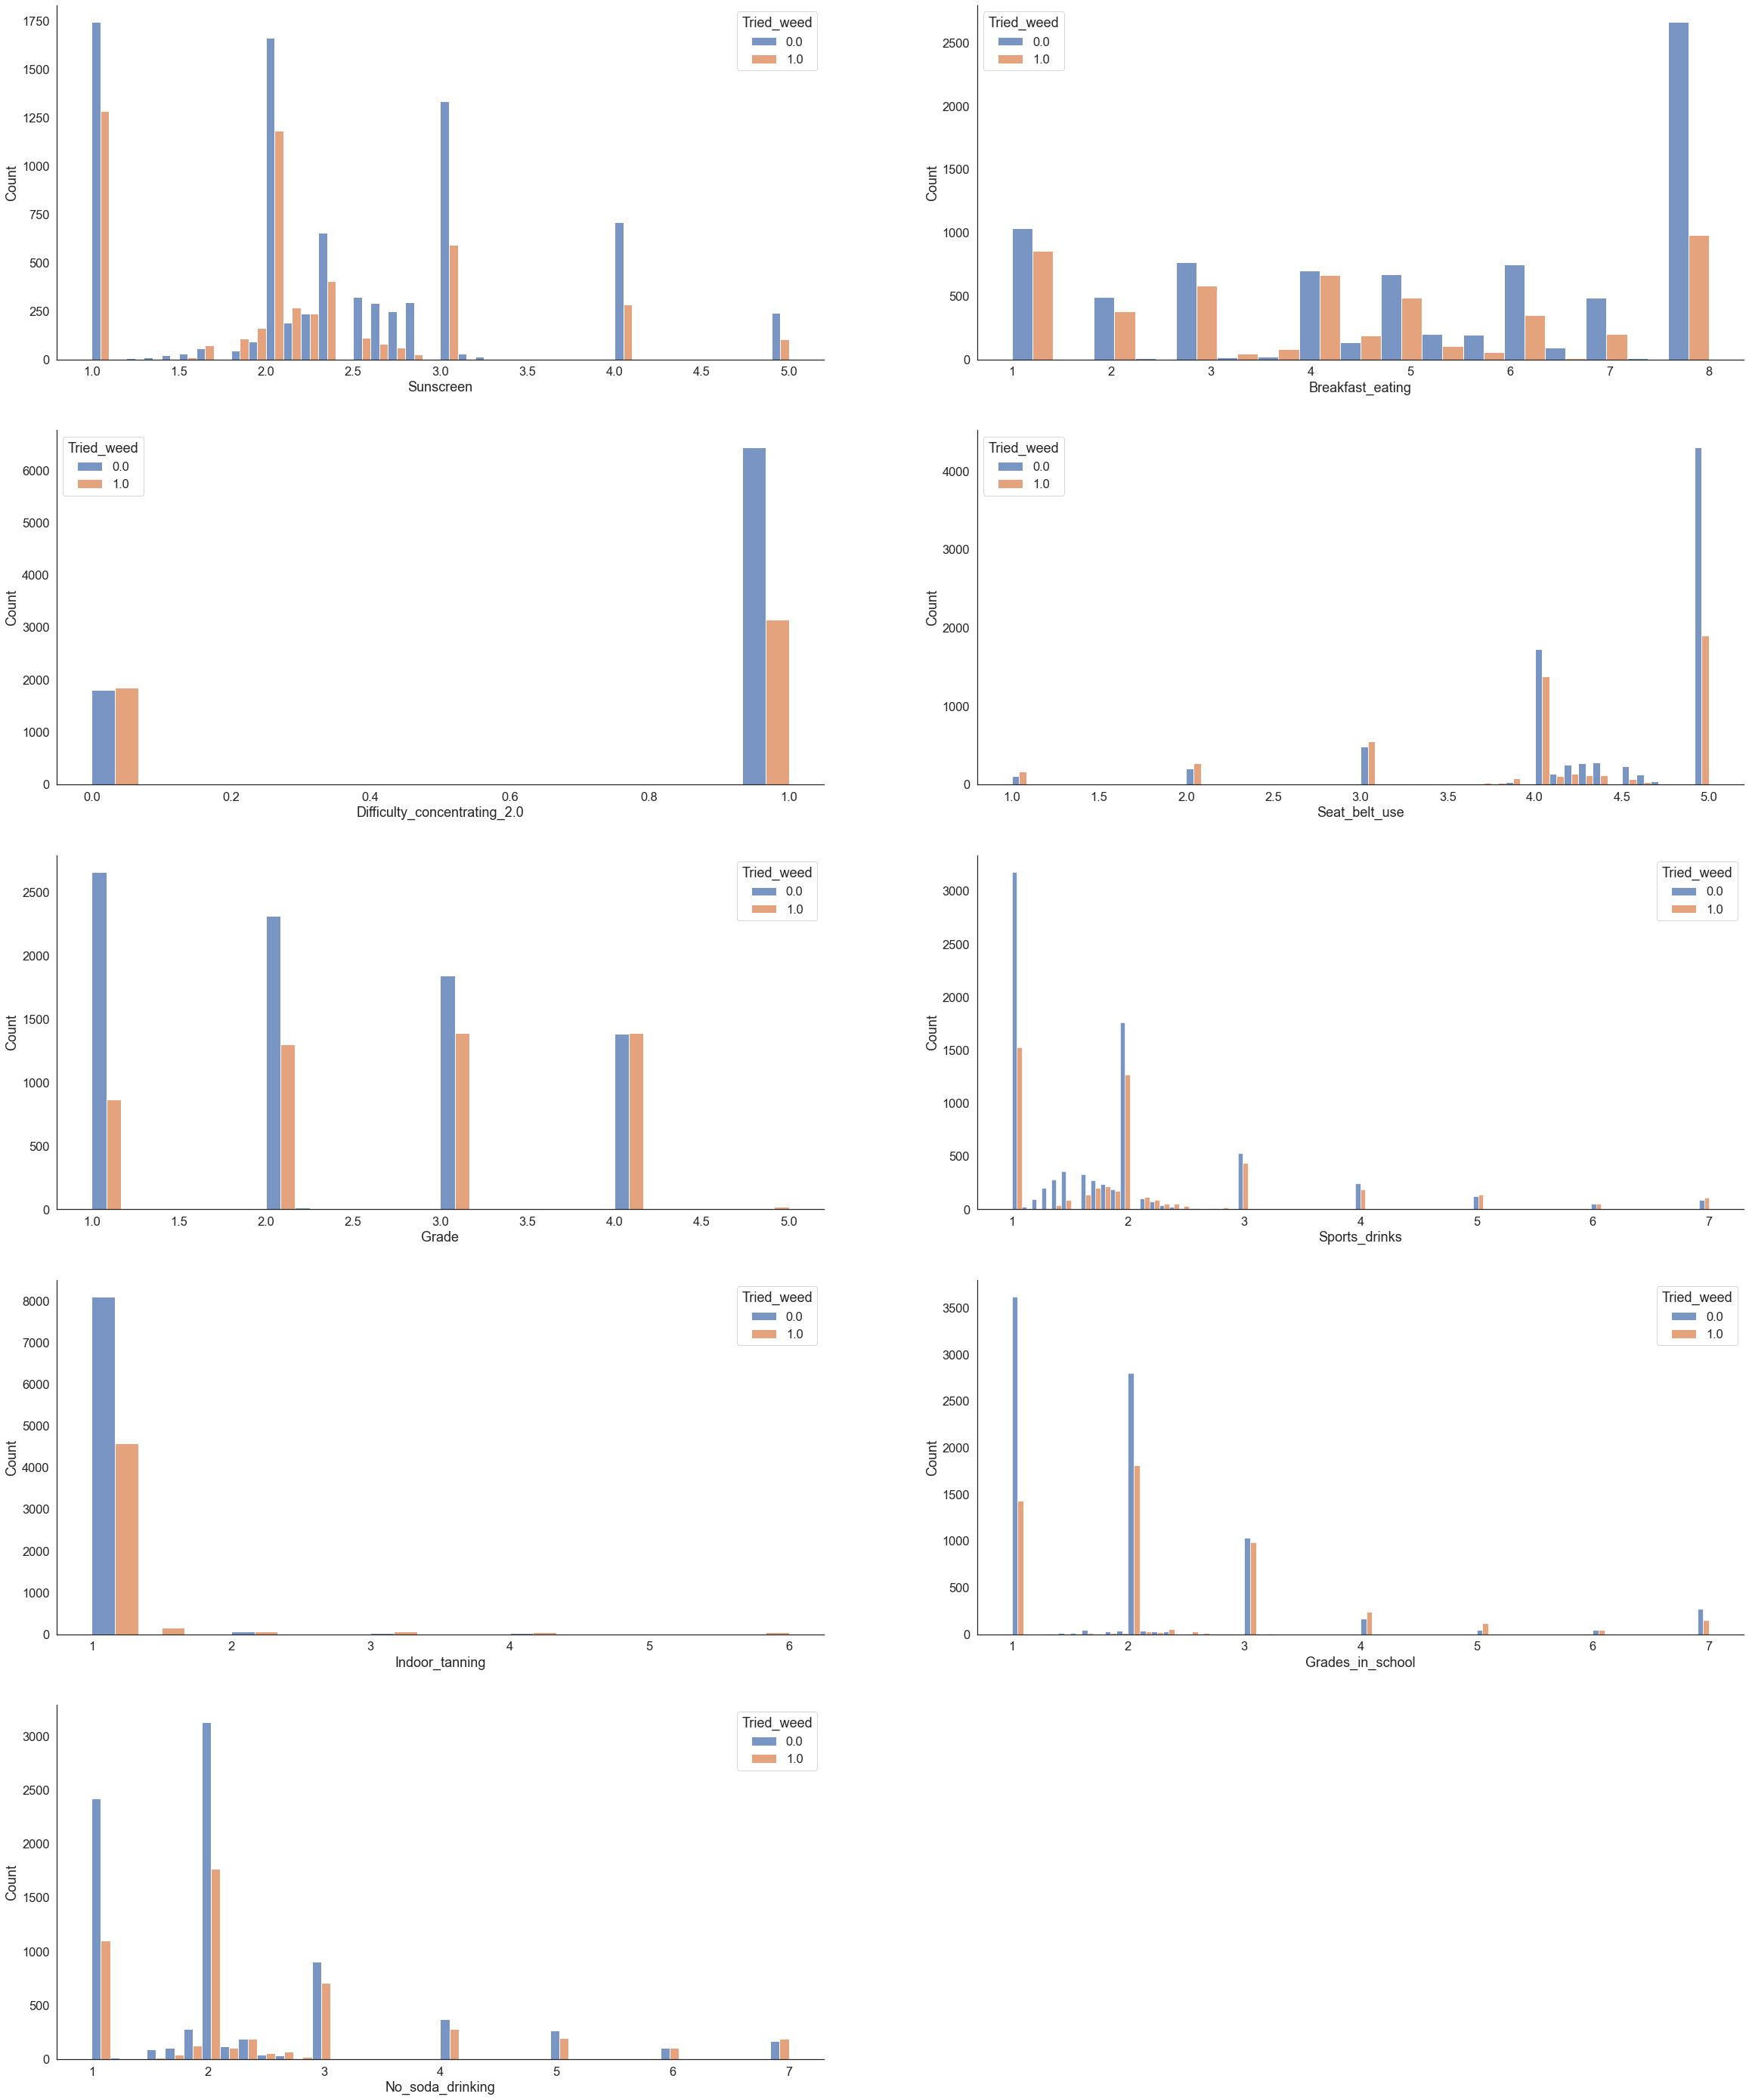

In [170]:
#display how target relate to Drugs usage
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[40,50])
for i in range(9):
    fig.add_subplot(5, 2, i+1)
    #sns.kdeplot(data=data1,x=data1.columns[i+30],hue='Tried_weed')
    sns.histplot(data=df_open_s, x=df_open_s.columns[i+1], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('open_data.png',transparent=True, bbox_inches='tight')

In [171]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [172]:
# fit model no training data
model = XGBClassifier()  #tune gamma #colsample_bytree [default=1, binary:logistic
model.fit(X_train, y_train)  
print(model) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [173]:
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [174]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [175]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1392  232]
 [ 510  516]]


0.72

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      1624
         1.0       0.69      0.50      0.58      1026

    accuracy                           0.72      2650
   macro avg       0.71      0.68      0.69      2650
weighted avg       0.72      0.72      0.71      2650



In [177]:
import xgboost as xgb

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

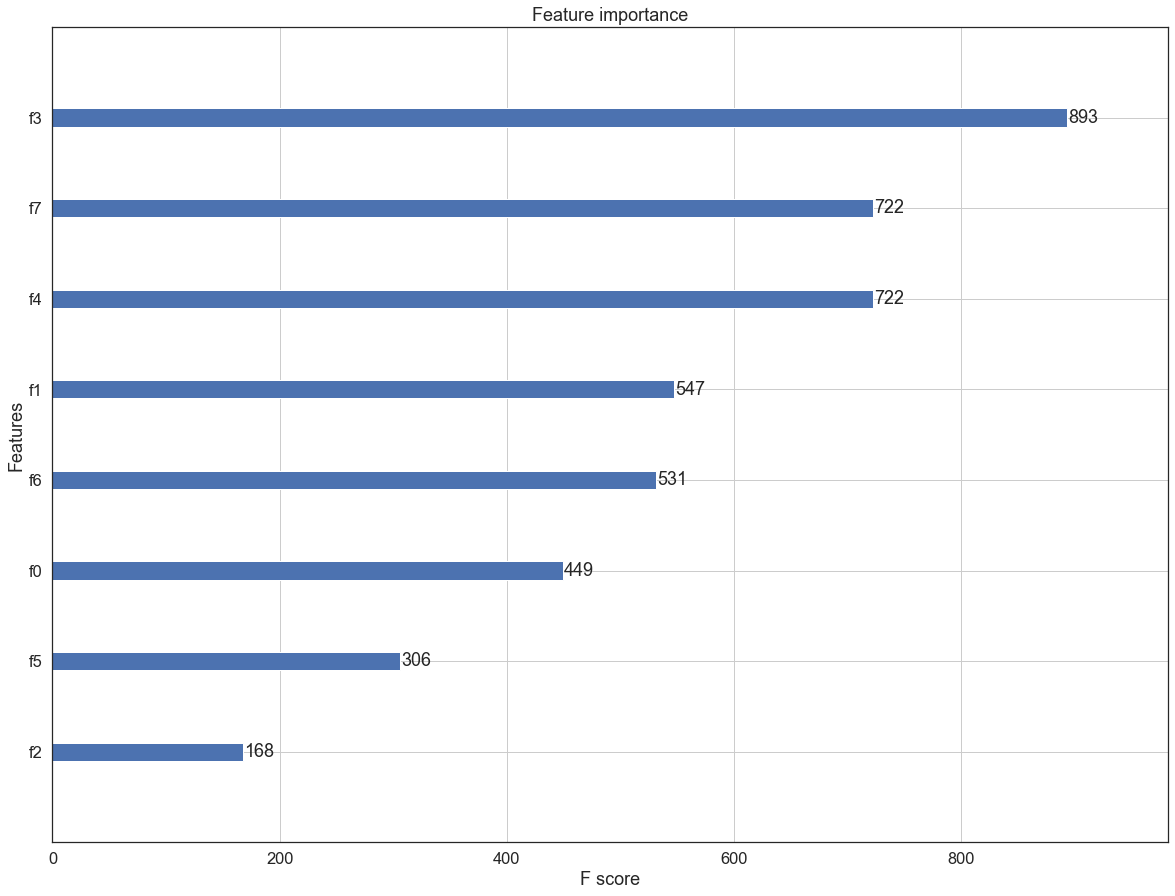

In [178]:
plt.figure(figsize=(20,15)) 
xgb.plot_importance(model, ax=plt.gca())

In [179]:
print("Number of boosting trees: {}".format(model.n_estimators)) 
print("Max depth of trees: {}".format(model.max_depth)) 
print("Objective function: {}".format(model.objective)) 


Number of boosting trees: 100
Max depth of trees: None
Objective function: binary:logistic


In [180]:
Xrf = df.iloc[:, :-1]
yrf = df.iloc[:, -1]

In [181]:
from sklearn.model_selection import train_test_split
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, test_size = 0.2, random_state = 0)

In [182]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xrf_train = sc.fit_transform(Xrf_train)
Xrf_test = sc.transform(Xrf_test)

In [183]:
# train your model using all data and the best known parameters
rf= RandomForestClassifier(random_state = 0,n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 4, max_features ='sqrt', max_depth = 50, criterion = 'entropy', bootstrap = True)
rf.fit(Xrf_train, yrf_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400, random_state=0)

In [184]:
# make a prediction on out-of-sample data
yrf_pred = rf.predict(Xrf_test)
cm = confusion_matrix(yrf_test, yrf_pred)
print(cm)
print(accuracy_score(yrf_test, yrf_pred))
print(roc_auc_score(yrf_test, yrf_pred))


[[1438  186]
 [ 203  823]]
0.8532075471698113
0.8438061149041186


In [185]:
Xrf.columns

Index(['Raceeth_2.0', 'Raceeth_3.0', 'Raceeth_4.0', 'Raceeth_5.0',
       'Raceeth_6.0', 'Raceeth_7.0', 'Raceeth_8.0', 'Gender_2.0',
       'Bullying_at_school_2.0', 'Electronic_bullying_2.0',
       ...
       'Sports_team_participation', 'Concussion', 'Sleep', 'Grades_in_school',
       'Sports_drinks', 'Plain_water', 'Muscle_strengthening',
       'Indoor_tanning', 'Sunscreen', 'How_well_speak_English'],
      dtype='object', length=119)

In [186]:
rf.feature_importances_

array([2.94858429e-04, 3.71913676e-03, 1.96697857e-05, 4.33946095e-03,
       9.41015593e-04, 1.54075905e-03, 4.86752912e-04, 3.22178893e-03,
       2.14080891e-03, 1.58581437e-03, 3.96755161e-03, 2.63314679e-03,
       1.69008317e-03, 1.24010843e-04, 4.66202775e-04, 8.59937153e-02,
       2.85956591e-03, 1.69460364e-03, 5.82716582e-03, 5.25199172e-03,
       6.22877735e-04, 1.79326896e-05, 5.77184459e-04, 1.56504705e-02,
       2.09164495e-03, 1.98543431e-03, 2.20321918e-03, 1.34968758e-03,
       3.82846021e-03, 1.89170970e-03, 4.33732584e-04, 7.49376137e-04,
       5.31208452e-03, 1.63003588e-03, 2.67093135e-03, 3.36028582e-03,
       9.36622258e-05, 6.68895654e-05, 5.59940903e-04, 1.54841755e-04,
       6.35639056e-03, 3.57783521e-03, 6.86431150e-04, 3.47961589e-04,
       1.78822316e-03, 2.97110466e-04, 2.76347512e-03, 1.44733548e-03,
       1.31068482e-03, 1.89153830e-03, 8.79383174e-04, 1.49837826e-03,
       4.38143614e-04, 1.22309060e-03, 5.50616051e-04, 6.85995643e-05,
      

In [187]:
df_impt1 = pd.DataFrame({'features':Xrf.columns,'importance':rf.feature_importances_})
df_impt1 = df_impt.sort_values(by='importance',ascending=False)
df_impt1

,features,importance
3,Breakfast_eating,0.167339
5,Indoor_tanning,0.153178
7,Sunscreen,0.147909
4,Sports_drinks,0.145223
1,Seat_belt_use,0.121153
0,Grade,0.117589
6,Grades_in_school,0.098968
2,Difficulty_concentrating_2.0,0.048642
